In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
#hide
from fastbook import *

# Cat vs Dog Classifier
We will be declaring an Animal Enumeration and then declare a function that will evaluate whether the argument is a Dog or Cat.

In [ ]:
# Importing everything from fastai library
from fastai.vision.all import *

# Enumeration for the Animals
class Animal(Enum):
  CAT = 'cat'
  DOG = 'dog'

# Generating a path URL for the path from where the images to be classified is to be downloaded
path = untar_data(URLs.PETS)/'images'

# Type of dataloader that helps applying different transformations and loading data
def getDbunch(animalType):
  return ImageDataLoaders.from_name_func(path, get_image_files(path), 
                                         valid_pct=0.2, 
                                         label_func=lambda x : x[0].isupper(),
                                         item_tfms=Resize(224))

## Creating two models for cats

In [ ]:
# Convolutional neural net learner with resnet34 for image classification

# Learn Cat
learn_cat = cnn_learner(getDbunch(Animal.CAT), resnet34, metrics=error_rate)
learn_cat.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.174274,0.015342,0.003383,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.065958,0.051168,0.008796,00:51
1,0.025112,0.009794,0.004060,00:52


### Using the uploader in order to upload a cat/dog image

In [ ]:
#hide_output
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

### Utilizing the uploaded image in order to detect whether the uploaded image is of a cat or a dog.

In [ ]:
# reading the image form the upload button
imgCat = PILImage.create(uploader.data[0])

# using the generated model to predict and get various information.
is_cat, _, probs_cat = learn_cat.predict(imgCat)

# output printing for cat
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs_cat[1].item():.6f}")

IndexError: ignored

# Image Segmentation

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.265998,2.354903,00:01


epoch,train_loss,valid_loss,time
0,1.870680,1.421329,00:01
1,1.596929,1.238337,00:01
2,1.457419,1.085752,00:01
3,1.340311,0.976376,00:01
4,1.226219,0.786190,00:01
5,1.111062,0.730977,00:01
6,1.015283,0.688020,00:01
7,0.940756,0.685275,00:01


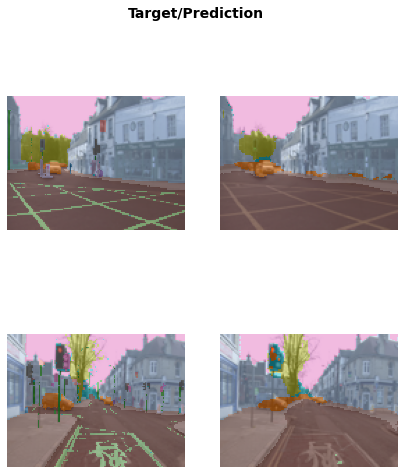

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

# Model for Classifying Sentences - Sentiment Analysis

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,0.469208,0.389247,0.826640,02:17


epoch,train_loss,valid_loss,accuracy,time
0,0.330104,0.246791,0.902760,04:15
1,0.234159,0.211554,0.921240,04:14
2,0.193615,0.195035,0.926160,04:14
3,0.149125,0.192730,0.929480,04:16


In [ ]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0024, 0.9976]))

# Decision Tree using TabularDataLoader

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.359032,0.372008,0.826781,00:05
1,0.345817,0.364151,0.831235,00:05
2,0.343119,0.360361,0.832924,00:05


# Collab Learner for Ranking

In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)


epoch,train_loss,valid_loss,time
0,1.508530,1.401080,00:00


epoch,train_loss,valid_loss,time
0,1.371805,1.346115,00:00
1,1.270882,1.175713,00:00
2,1.043889,0.870460,00:00
3,0.801818,0.721443,00:00
4,0.700558,0.682921,00:00
5,0.646406,0.670174,00:00
6,0.625416,0.665378,00:00
7,0.604021,0.662487,00:00
8,0.605596,0.661710,00:00
9,0.603191,0.661515,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,91.0,82.0,3.0,3.245149
1,23.0,55.0,4.5,3.612245
2,91.0,27.0,3.0,3.272521
3,1.0,43.0,3.5,3.333033
4,70.0,95.0,5.0,4.279758
5,27.0,58.0,3.0,3.893072
6,90.0,97.0,5.0,4.129246
7,64.0,97.0,5.0,3.986511
8,18.0,14.0,4.5,3.978377
